In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

orig_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
car_mpg = orig_dataset.copy()

In [4]:
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
car_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
car_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

 we have 6 nulls. let's drop them

In [7]:
car_mpg = car_mpg.dropna()

In [8]:
car_mpg.shape

(392, 8)

In [9]:
car_mpg['origin'] = car_mpg['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
car_mpg.origin.value_counts()

USA       245
Japan      79
Europe     68
Name: origin, dtype: int64

[]

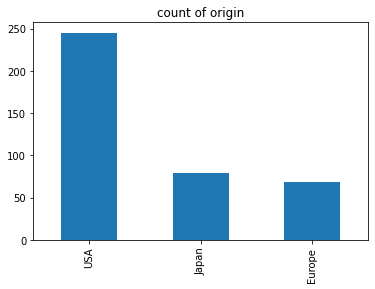

In [10]:
car_mpg.origin.value_counts().plot.bar(title="count of origin")
plt.plot()

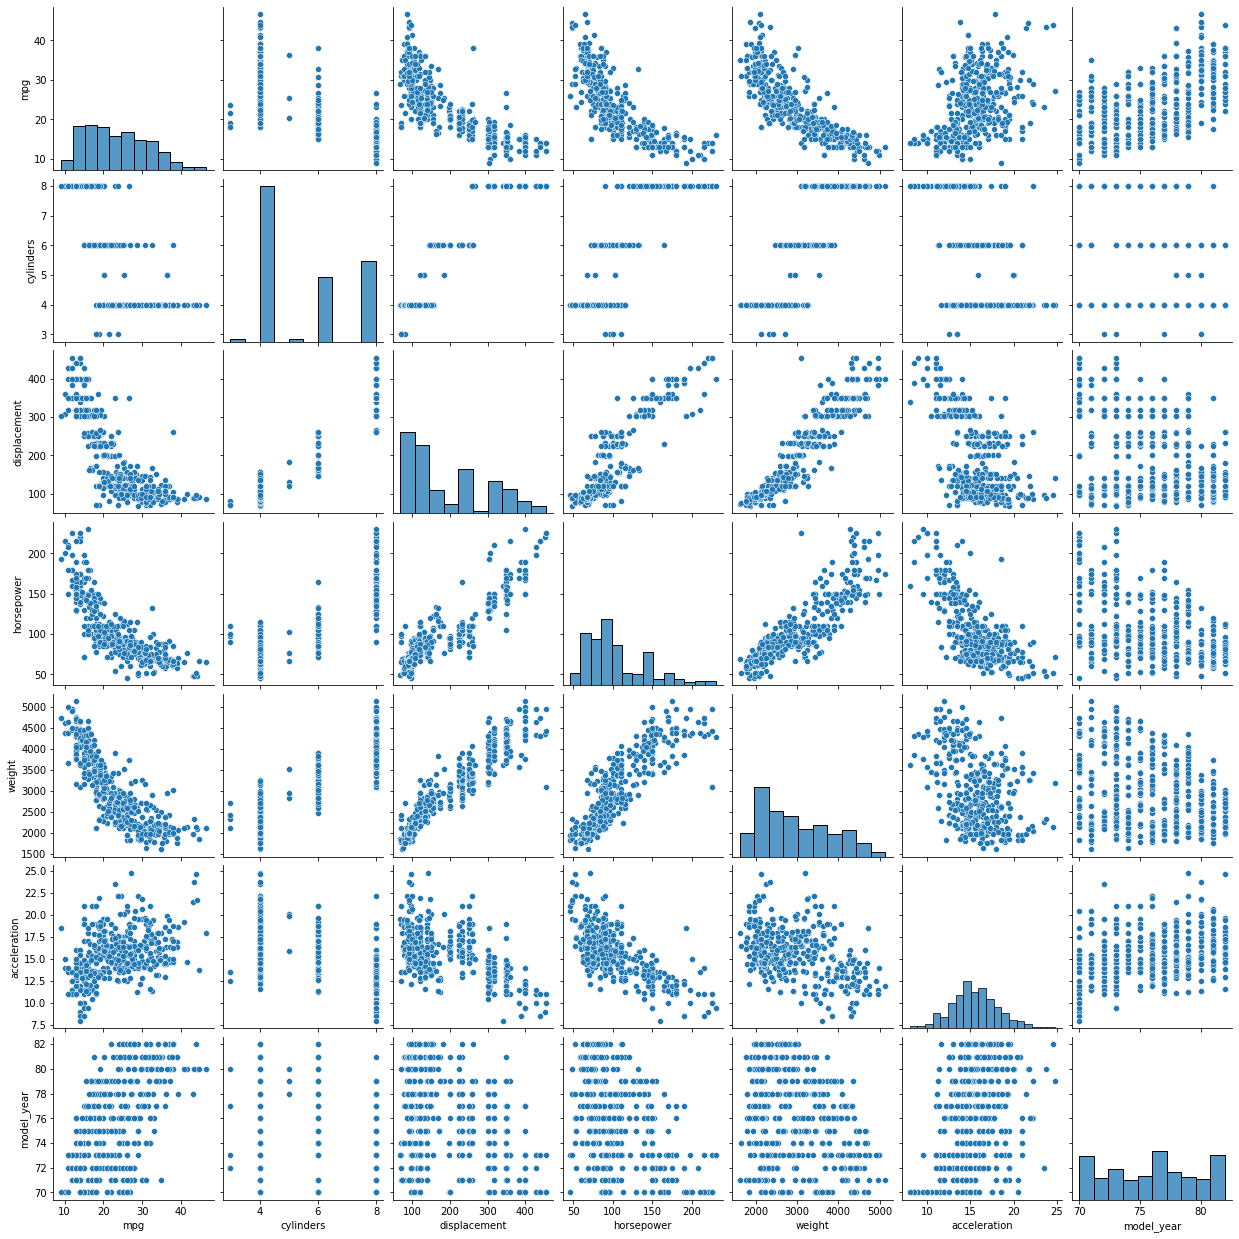

In [11]:
sns.pairplot(car_mpg)

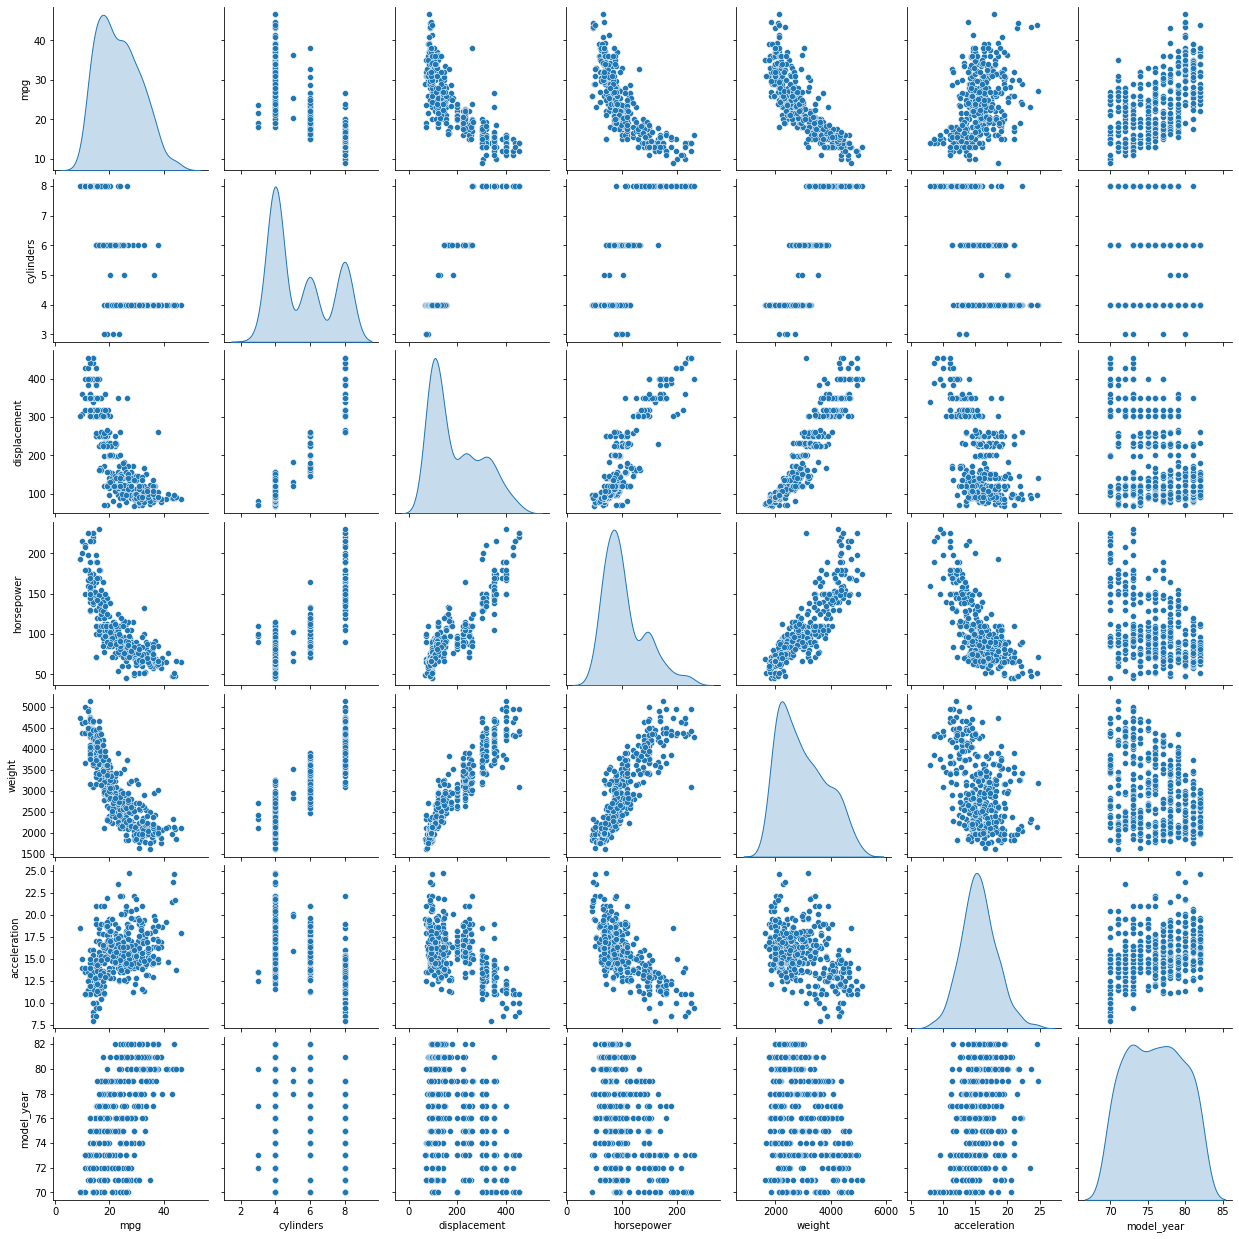

In [12]:
sns.pairplot(car_mpg, diag_kind='kde')

# compute the correlation matrix

In [13]:
# compute correlation
cor = car_mpg.corr()

# Correlation

# heatmap of correlation

[]

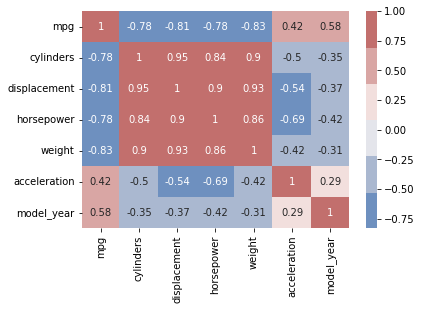

In [14]:


# plot the heatmap
sns.heatmap(cor, 
            annot=True,
            cmap=sns.color_palette("vlag"), 
        xticklabels=cor.columns,
        yticklabels=cor.columns)

plt.plot()

# show the correlation

In [15]:
cor['mpg'].sort_values(ascending=False)

mpg             1.000000
model_year      0.580541
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

# positive correlation

In [16]:
cor[cor['mpg']>0]['mpg'].sort_values(ascending=False)

mpg             1.000000
model_year      0.580541
acceleration    0.423329
Name: mpg, dtype: float64

# negative correlation

In [17]:
cor[cor['mpg']<0]['mpg'].sort_values(ascending=True)

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
Name: mpg, dtype: float64

stats model allows us to perform a single regression for one predictor an outcome. it does not allow multiple regression (multiple predictors). But for this investigation we'd like to see each predictor and our outcome separately. 

r2_value 0.6926304331206254
p value 6.015296051435726e-102


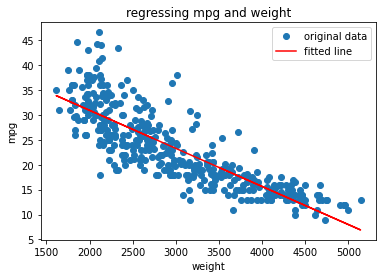

In [18]:
predictor = 'weight'

model = stats.linregress(car_mpg[predictor], car_mpg['mpg'])
print("r2_value",model.rvalue**2)
print("p value",model.pvalue)

#print("r2_value",model.coef)
plt.plot(car_mpg[predictor], car_mpg['mpg'], 'o', label='original data')
plt.plot(car_mpg[predictor], model.intercept + model.slope*car_mpg[predictor], 'r', label='fitted line')
plt.legend()
plt.title(f'regressing mpg and {predictor}')
plt.xlabel(predictor)
plt.ylabel('mpg')
plt.show()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


r2 0.6059482578894345
p value 7.031989029405463e-81


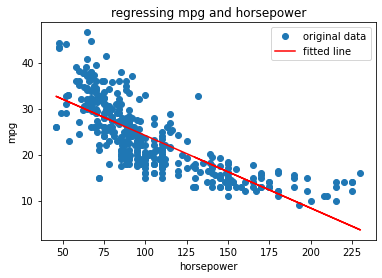

In [20]:
predictor = 'horsepower'

model = stats.linregress(car_mpg[predictor], car_mpg['mpg'])
print("r2",model.rvalue**2)
print("p value",model.pvalue)
#print("r2_value",model.coef)
plt.plot(car_mpg[predictor], car_mpg['mpg'], 'o', label='original data')
plt.plot(car_mpg[predictor], model.intercept + model.slope*car_mpg[predictor], 'r', label='fitted line')
plt.legend()
plt.title(f'regressing mpg and {predictor}')
plt.xlabel(predictor)
plt.ylabel('mpg')
plt.show()

r2 0.3370278133096226
p value 1.0757935564158799e-36


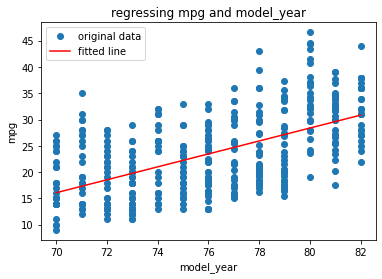

In [21]:
predictor = 'model_year'

model = stats.linregress(car_mpg[predictor], car_mpg['mpg'])
print("r2",model.rvalue**2)
print("p value",model.pvalue)
#print("r2_value",model.coef)
plt.plot(car_mpg[predictor], car_mpg['mpg'], 'o', label='original data')
plt.plot(car_mpg[predictor], model.intercept + model.slope*car_mpg[predictor], 'r', label='fitted line')
plt.legend()
plt.title(f'regressing mpg and {predictor}')
plt.xlabel(predictor)
plt.ylabel('mpg')
plt.show()

# removing redundant code with a function

It's getting clear that this needs to be repeated for each predictor. let's create a function to simplify

In [22]:
def helper_fun(predictor,df):
  model = stats.linregress(df[predictor], df['mpg'])
  print("r2",model.rvalue**2)
  print("p value",model.pvalue)
  #print("r2_value",model.coef)
  plt.plot(df[predictor], df['mpg'], 'o', label='original data')
  plt.plot(df[predictor], model.intercept + model.slope*df[predictor], 'r', label='fitted line')
  plt.legend()
  plt.title(f'regressing mpg and {predictor}')
  plt.xlabel(predictor)
  plt.ylabel('mpg')
  plt.show()

r2 0.3370278133096226
p value 1.0757935564158799e-36


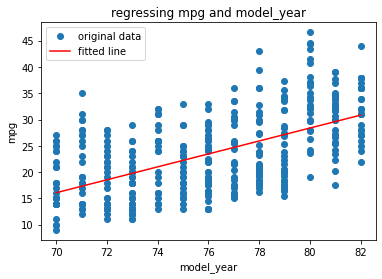

In [23]:
helper_fun('model_year',car_mpg)

In [24]:
car_mpg.drop('origin',axis=1).columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

r2 1.0
p value 0.0


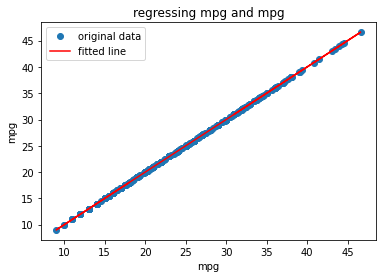

r2 0.604688988944123
p value 1.3113836370998321e-80


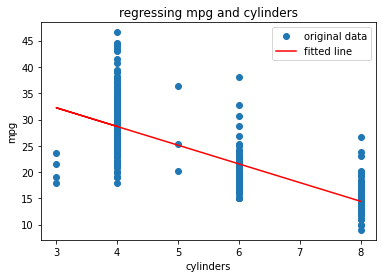

r2 0.6482294003193045
p value 1.6606418277975981e-90


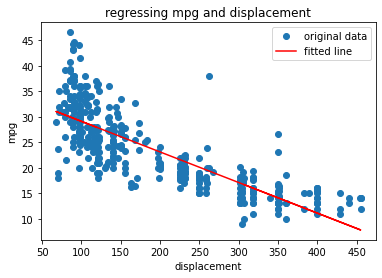

r2 0.6059482578894345
p value 7.031989029405463e-81


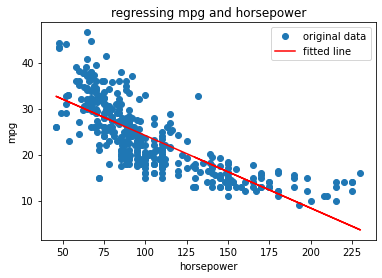

r2 0.6926304331206254
p value 6.015296051435726e-102


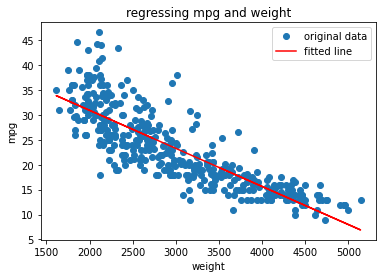

r2 0.17920705015625463
p value 1.7785761248041197e-18


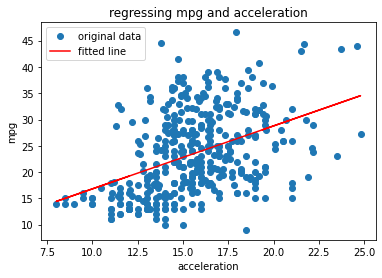

r2 0.3370278133096226
p value 1.0757935564158799e-36


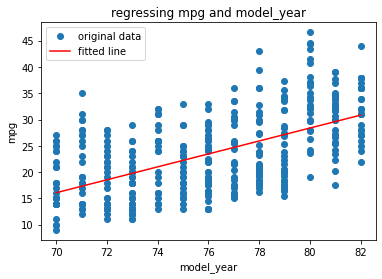

In [25]:
for col in car_mpg.drop('origin',axis=1).columns:
  helper_fun(col,car_mpg)

In [26]:
cat_data = pd.get_dummies(car_mpg[['mpg','origin']])
cat_data.head()

,mpg,origin_Europe,origin_Japan,origin_USA
0,18.0,0,0,1
1,15.0,0,0,1
2,18.0,0,0,1
3,16.0,0,0,1
4,17.0,0,0,1


r2 0.31940649639450347
p value 1.8397072868720683e-34


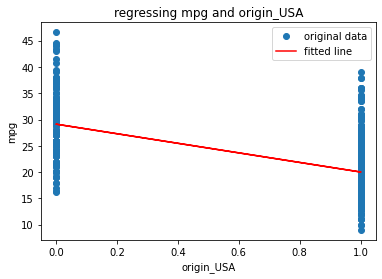

In [27]:
helper_fun('origin_USA',cat_data)

In [28]:
cat_data.groupby('origin_USA').mean()

,mpg,origin_Europe,origin_Japan
origin_USA,,,
0,29.133333,0.462585,0.537415
1,20.033469,0.000000,0.000000


r2 0.059688598137246765
p value 9.776543423053121e-07


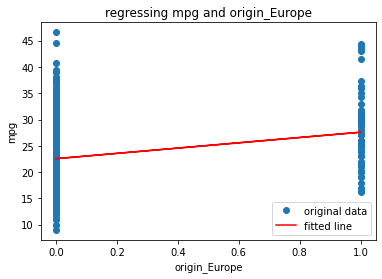

In [29]:
helper_fun('origin_Europe',cat_data)

In [30]:
cat_data.groupby('origin_Europe').mean()

,mpg,origin_Japan,origin_USA
origin_Europe,,,
0,22.573457,0.243827,0.756173
1,27.602941,0.000000,0.000000


r2 0.20381037997674437
p value 4.420895151852501e-21


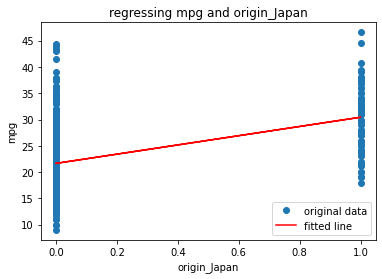

In [31]:
helper_fun('origin_Japan',cat_data)

In [32]:
cat_data.groupby('origin_Japan').mean()

,mpg,origin_Europe,origin_USA
origin_Japan,,,
0,21.677955,0.217252,0.782748
1,30.450633,0.000000,0.000000


In [33]:
model.slope

1.2300354634480308

In [34]:
import numpy as np

Using the values 29 and 20 for origin_USA 0 and 1 respectively inspect the graph. do you see where those values match the graph? not coincidentally they are exactly where the red line intersects the data for 0 and 1. Check Europe and Japan to check your understanding. 

regression for categorical data simply involves finding the mean value for that category. 

# understanding non-linearity and transforms

In [35]:
new_car_mpg = car_mpg.copy()
new_car_mpg['horsepower_1_over_x'] = new_car_mpg['horsepower']**.05

r2 0.6059482578894345
p value 7.031989029405463e-81


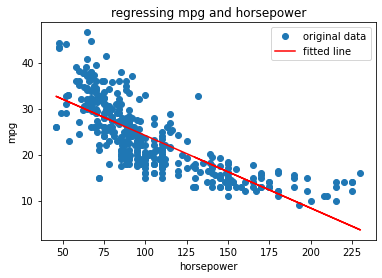

In [36]:
helper_fun('horsepower',new_car_mpg)

In [37]:
1/10


0.1

r2 0.6665640178137221
p value 4.798289980133138e-95


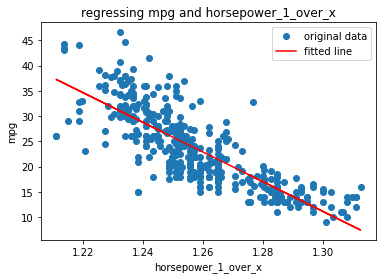

In [38]:
helper_fun('horsepower_1_over_x',new_car_mpg)

our new R squared suggests we have improved the overall fit of the line. We have changed the predictorwith a non-linear transform, and our result is a more linear results. But what does our x axis unit mean now? It could be translated back to the original units with the inverse of the transform we used but the casual observer will no longer easily be able to interpret horsepower. 

Also, have ALL the dots gotten closer to the line in ALL cases? or have we made some worse? Transforms like this are often a tradeoff. 

This is your first foray into a topic known as "Feature Engineering" in which you attempt to improve your model by creating new features based on the original data. 

In [39]:
!cp "/content/drive/My Drive/Colab Notebooks/4482_Tutorial_Regression_EDA.ipynb" ./

# run the second shell command, jupyter nbconvert --to html "file name of the notebook"
# create html from ipynb

!jupyter nbconvert --to html "4482_Tutorial_Regression_EDA.ipynb"

[NbConvertApp] Converting notebook 4482_Tutorial_Regression_EDA.ipynb to html
[NbConvertApp] Writing 804165 bytes to 4482_Tutorial_Regression_EDA.html
